In [161]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from tqdm.notebook import tqdm
from scipy.special import softmax







In [162]:
# file path
file_path = './input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv'

# Load the dataset
df = pd.read_csv(file_path)


# EDA: Basic Information

In [163]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [164]:
print(df.shape)

(20491, 2)


In [165]:
df['Review'].values[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [167]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [168]:
# Describe the 'Rating' column and round the results
df['Rating'].describe().round()

count    20491.0
mean         4.0
std          1.0
min          1.0
25%          3.0
50%          4.0
75%          5.0
max          5.0
Name: Rating, dtype: float64

In [169]:
# Check for duplicated rows in the DataFrame
df.duplicated().sum()


0

In [170]:
# Get the number of unique rating categories
rating_cat = df['Rating'].nunique()

# Get the unique rating values
df.duplicated().sum()
print(f'There are {rating_cat} category of rating in the dataset.')
print('These ratings are:', rating)

There are 5 category of rating in the dataset.
These ratings are: [4 2 3 5 1]


In [171]:
# Count the occurrences of each rating value and sort by index
rating_count = df['Rating'].value_counts().sort_index()
rating_count_df = pd.DataFrame(rating_count).reset_index()
rating_count_df.columns = ['Rating', 'Count']

# EDA: Visualization

C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_4308\3183614177.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




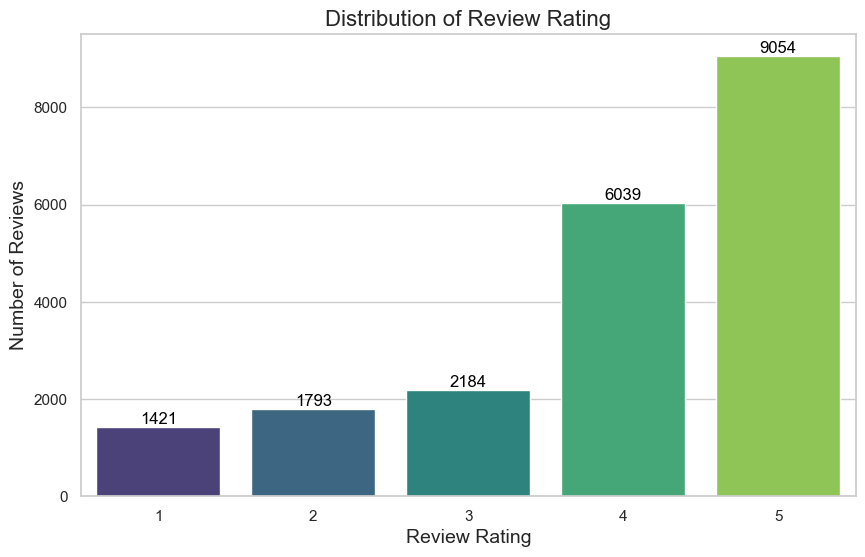

In [172]:
sns.set(style='whitegrid')

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Rating', y='Count', data=rating_count_df, palette='viridis')


plt.title('Distribution of Review Rating', fontsize=16)
plt.xlabel('Review Rating', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}', 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', fontsize=12, color='black')

plt.show()

In [173]:
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_4308\2351037903.py:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



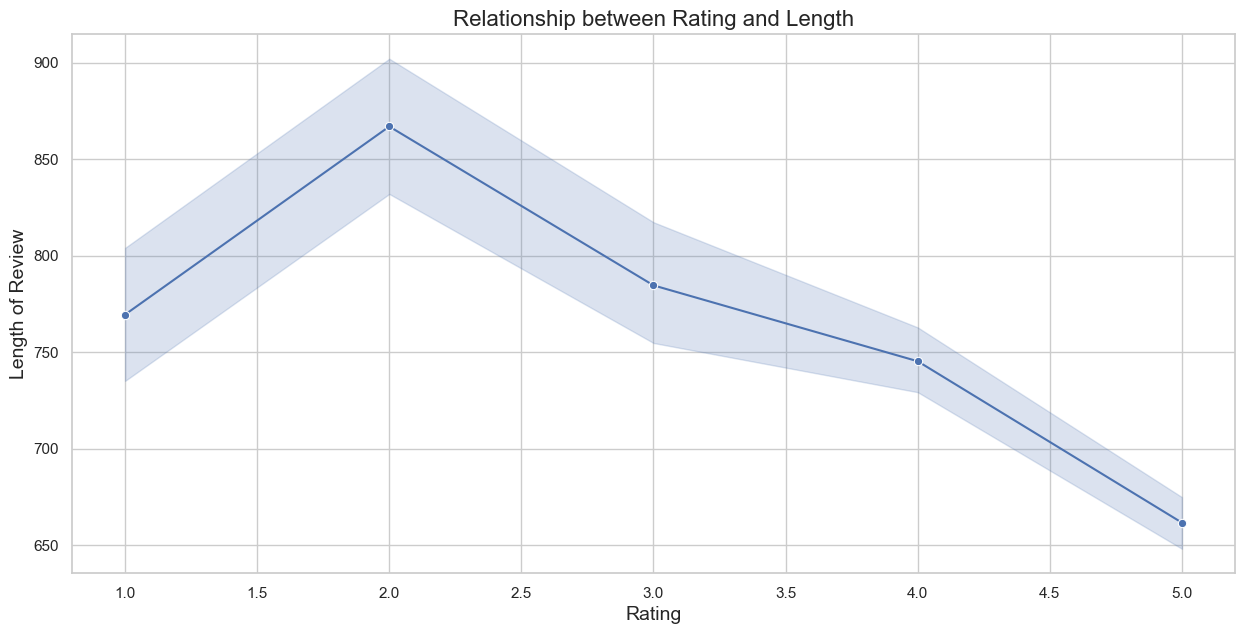

In [174]:
# Plot the relationship between Rating and Length

plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x="Rating", y="Length", marker='o', palette='viridis')
plt.title('Relationship between Rating and Length', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Length of Review', fontsize=14)
plt.show()

In [175]:
 #  the length reviews has effect in the rating

In [176]:
px.scatter(df,x="Rating",y="Length", color="Rating")


In [177]:
# Calculate the total number of reviews
total_reviews = rating_count.sum()
rating_percentage = (rating_count / total_reviews) * 100
rating_percentage_df = pd.DataFrame(rating_percentage).reset_index()
rating_percentage_df.columns = ['Rating', 'Percentage']

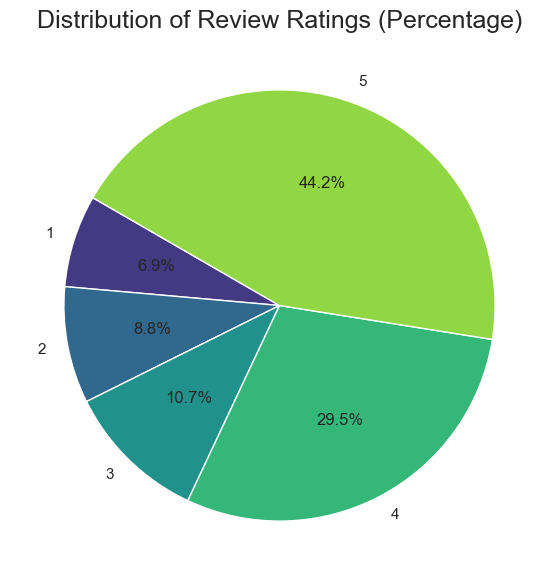

In [178]:
# Create a pie chart for the distribution of review ratings
plt.figure(figsize=(10, 7))
plt.pie(rating_percentage_df['Percentage'], labels=rating_percentage_df['Rating'], 
            autopct='%1.1f%%', startangle=150, colors=sns.color_palette('viridis', len(rating_percentage_df)))

plt.title('Distribution of Review Ratings (Percentage)', fontsize=18)
plt.show()

# NLTK 

In [179]:
# Example review for NLP processing
example = df['Review'][145]
print(example)

best budget hotel seattle, reviews right best place location, easy walking distance, floor n't kept awake street traffic ca n't vouch lower rooms, reception friendly price great seattle.only negative points dingy little bathroom fairly small lift cares,  


In [180]:
# Tokenize the example review
tokens = nltk.word_tokenize(example)
print(tokens)

['best', 'budget', 'hotel', 'seattle', ',', 'reviews', 'right', 'best', 'place', 'location', ',', 'easy', 'walking', 'distance', ',', 'floor', "n't", 'kept', 'awake', 'street', 'traffic', 'ca', "n't", 'vouch', 'lower', 'rooms', ',', 'reception', 'friendly', 'price', 'great', 'seattle.only', 'negative', 'points', 'dingy', 'little', 'bathroom', 'fairly', 'small', 'lift', 'cares', ',']


In [181]:
#Print the tagged tokens
tagged_tokens = nltk.pos_tag(tokens)
print(tagged_tokens)

[('best', 'JJS'), ('budget', 'NN'), ('hotel', 'NN'), ('seattle', 'NN'), (',', ','), ('reviews', 'VB'), ('right', 'RB'), ('best', 'JJS'), ('place', 'NN'), ('location', 'NN'), (',', ','), ('easy', 'JJ'), ('walking', 'VBG'), ('distance', 'NN'), (',', ','), ('floor', 'NN'), ("n't", 'RB'), ('kept', 'VBD'), ('awake', 'JJ'), ('street', 'NN'), ('traffic', 'NN'), ('ca', 'MD'), ("n't", 'RB'), ('vouch', 'VB'), ('lower', 'JJR'), ('rooms', 'NNS'), (',', ','), ('reception', 'NN'), ('friendly', 'JJ'), ('price', 'NN'), ('great', 'JJ'), ('seattle.only', 'RB'), ('negative', 'JJ'), ('points', 'NNS'), ('dingy', 'JJ'), ('little', 'JJ'), ('bathroom', 'NN'), ('fairly', 'RB'), ('small', 'JJ'), ('lift', 'NN'), ('cares', 'NNS'), (',', ',')]


In [182]:
# Perform named entity recognition (NER)
chunked = nltk.ne_chunk(tagged_tokens)
print(chunked)
                        

(S
  best/JJS
  budget/NN
  hotel/NN
  seattle/NN
  ,/,
  reviews/VB
  right/RB
  best/JJS
  place/NN
  location/NN
  ,/,
  easy/JJ
  walking/VBG
  distance/NN
  ,/,
  floor/NN
  n't/RB
  kept/VBD
  awake/JJ
  street/NN
  traffic/NN
  ca/MD
  n't/RB
  vouch/VB
  lower/JJR
  rooms/NNS
  ,/,
  reception/NN
  friendly/JJ
  price/NN
  great/JJ
  seattle.only/RB
  negative/JJ
  points/NNS
  dingy/JJ
  little/JJ
  bathroom/NN
  fairly/RB
  small/JJ
  lift/NN
  cares/NNS
  ,/,)


# NLP: Sentiment Analysis with VADER

In [183]:
# Initialize the VADER sentiment intensity analyzer
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


In [184]:
sia.polarity_scores(example)

{'neg': 0.066, 'neu': 0.516, 'pos': 0.418, 'compound': 0.9627}

In [185]:
# Perform VADER sentiment analysis on all reviews
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
        text = row['Review']
        my_index = row.name 
        res[my_index] = sia.polarity_scores(text)

  0%|          | 0/20491 [00:00<?, ?it/s]

In [186]:
res

{0: {'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'compound': 0.9747},
 1: {'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'compound': 0.9787},
 2: {'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'compound': 0.9889},
 3: {'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'compound': 0.9912},
 4: {'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'compound': 0.9797},
 5: {'neg': 0.084, 'neu': 0.651, 'pos': 0.265, 'compound': 0.987},
 6: {'neg': 0.026, 'neu': 0.609, 'pos': 0.364, 'compound': 0.9925},
 7: {'neg': 0.032, 'neu': 0.74, 'pos': 0.228, 'compound': 0.959},
 8: {'neg': 0.038, 'neu': 0.663, 'pos': 0.298, 'compound': 0.9618},
 9: {'neg': 0.064, 'neu': 0.451, 'pos': 0.484, 'compound': 0.9756},
 10: {'neg': 0.08, 'neu': 0.524, 'pos': 0.395, 'compound': 0.9666},
 11: {'neg': 0.076, 'neu': 0.629, 'pos': 0.296, 'compound': 0.9242},
 12: {'neg': 0.075, 'neu': 0.551, 'pos': 0.374, 'compound': 0.9859},
 13: {'neg': 0.138, 'neu': 0.639, 'pos': 0.224, 'compound': 0.7584},
 14: {'neg': 0.051, 'neu': 0.467, 'pos': 0.482, 'com

In [187]:
vaders = pd.DataFrame(res).T


In [188]:
# Merge VADER sentiment scores with the original DataFrame
merged_df = pd.concat([vaders, df], axis=1)
merged_df.head()

,neg,neu,pos,compound,Review,Rating,Length
0,0.072,0.643,0.285,0.9747,nice hotel expensive parking got good deal sta...,4,593
1,0.110,0.701,0.189,0.9787,ok nothing special charge diamond member hilto...,2,1689
2,0.081,0.700,0.219,0.9889,nice rooms not 4* experience hotel monaco seat...,3,1427
3,0.060,0.555,0.385,0.9912,"unique, great stay, wonderful time hotel monac...",5,600
4,0.135,0.643,0.221,0.9797,"great stay great stay, went seahawk game aweso...",5,1281


C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_4308\129786484.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




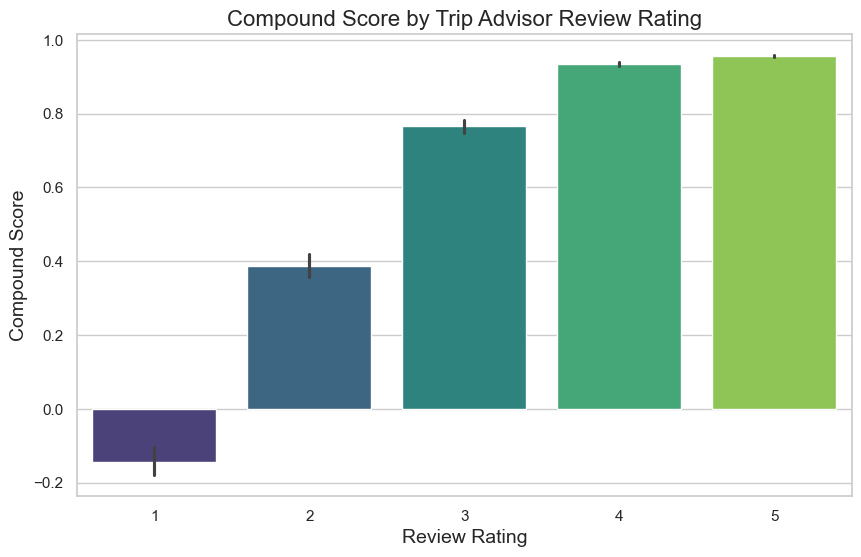

In [189]:
# Plot the compound score by review rating
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=merged_df, x='Rating', y='compound', palette='viridis')
ax.set_title('Compound Score by Trip Advisor Review Rating', fontsize=16)
ax.set_xlabel('Review Rating', fontsize=14)
ax.set_ylabel('Compound Score', fontsize=14)
plt.show()


Text(0.5, 1.0, 'negative')

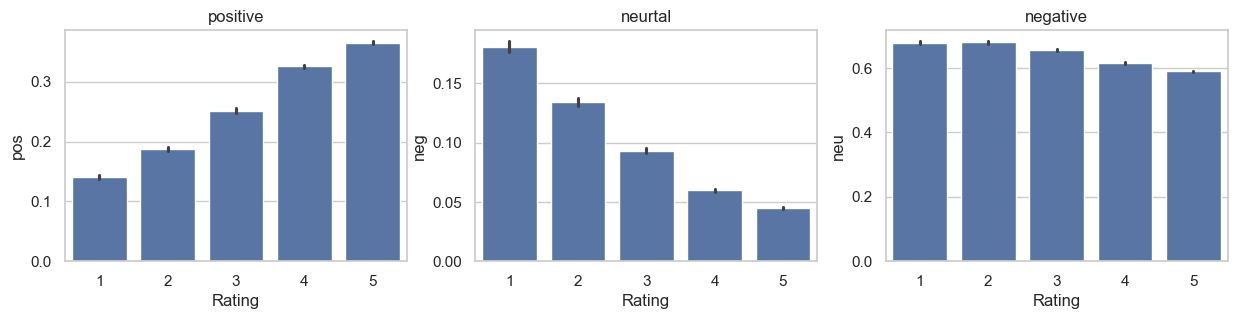

In [190]:
# Plot positive, neutral, and negative scores by review rating
fig, axs= plt.subplots (1,3, figsize = (15,3))
sns.barplot(merged_df, x='Rating', y = 'pos', ax= axs[0])
sns.barplot(merged_df, x='Rating', y = 'neg', ax=axs[1])
sns.barplot(merged_df, x='Rating', y = 'neu', ax=axs[2])
axs[0].set_title('positive')
axs[1].set_title('neurtal')
axs[2].set_title('negative')

## Roberta Pretrained Model

In [191]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [192]:
# Load the pre-trained RoBERTa model for sentiment analysis
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [193]:
print(example)
sia.polarity_scores(example)

best budget hotel seattle, reviews right best place location, easy walking distance, floor n't kept awake street traffic ca n't vouch lower rooms, reception friendly price great seattle.only negative points dingy little bathroom fairly small lift cares,  


{'neg': 0.066, 'neu': 0.516, 'pos': 0.418, 'compound': 0.9627}

In [194]:
# Function to get RoBERTa sentiment scores
def polarity_scores_roberta(example):
 encoded_text = tokenizer(example, return_tensors= 'pt')
 output = model(**encoded_text)

 scores = output[0][0].detach().numpy() 
 scores = softmax(scores)
 scores_dict = {
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]}
 return scores_dict


In [195]:
limited_df = df.head(1000)

In [196]:
# Perform both VADER and RoBERTa sentiment analysis
res = {}
for i, row in tqdm(limited_df.iterrows(), total=len(limited_df)):
    try:
        text = row['Review']
        my_index = row.name

        # Perform VADER sentiment analysis
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}

        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        # Perform RoBERTa sentiment analysis
        roberta_result = polarity_scores_roberta(text)

        both = {**vader_result_rename, **roberta_result}

        # Store the combined results in the dictionary
        res[my_index] = both

    except RuntimeError:
        # Print an error message if a runtime error occurs
        print(f'Broke for id {my_index}')


  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 344
Broke for id 442
Broke for id 487


In [197]:
results_df = pd.DataFrame(res).T
print(results_df)

     vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
0        0.072      0.643      0.285          0.9747     0.019479   
1        0.110      0.701      0.189          0.9787     0.587673   
2        0.081      0.700      0.219          0.9889     0.289251   
3        0.060      0.555      0.385          0.9912     0.003897   
4        0.135      0.643      0.221          0.9797     0.073829   
..         ...        ...        ...             ...          ...   
995      0.078      0.615      0.307          0.6808     0.067290   
996      0.040      0.683      0.277          0.9442     0.016180   
997      0.164      0.613      0.223          0.6964     0.050840   
998      0.059      0.628      0.313          0.9628     0.008458   
999      0.108      0.644      0.248          0.8354     0.195774   

     roberta_neu  roberta_pos  
0       0.104079     0.876442  
1       0.358501     0.053826  
2       0.548734     0.162015  
3       0.033762     0.962341  
4       0.3

In [198]:
# Merge the results with the original DataFrame
results_df = results_df.merge(df, left_index=True, right_index=True, how='left')


In [199]:
results_df.columns

Index(['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos', 'Review', 'Rating', 'Length'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

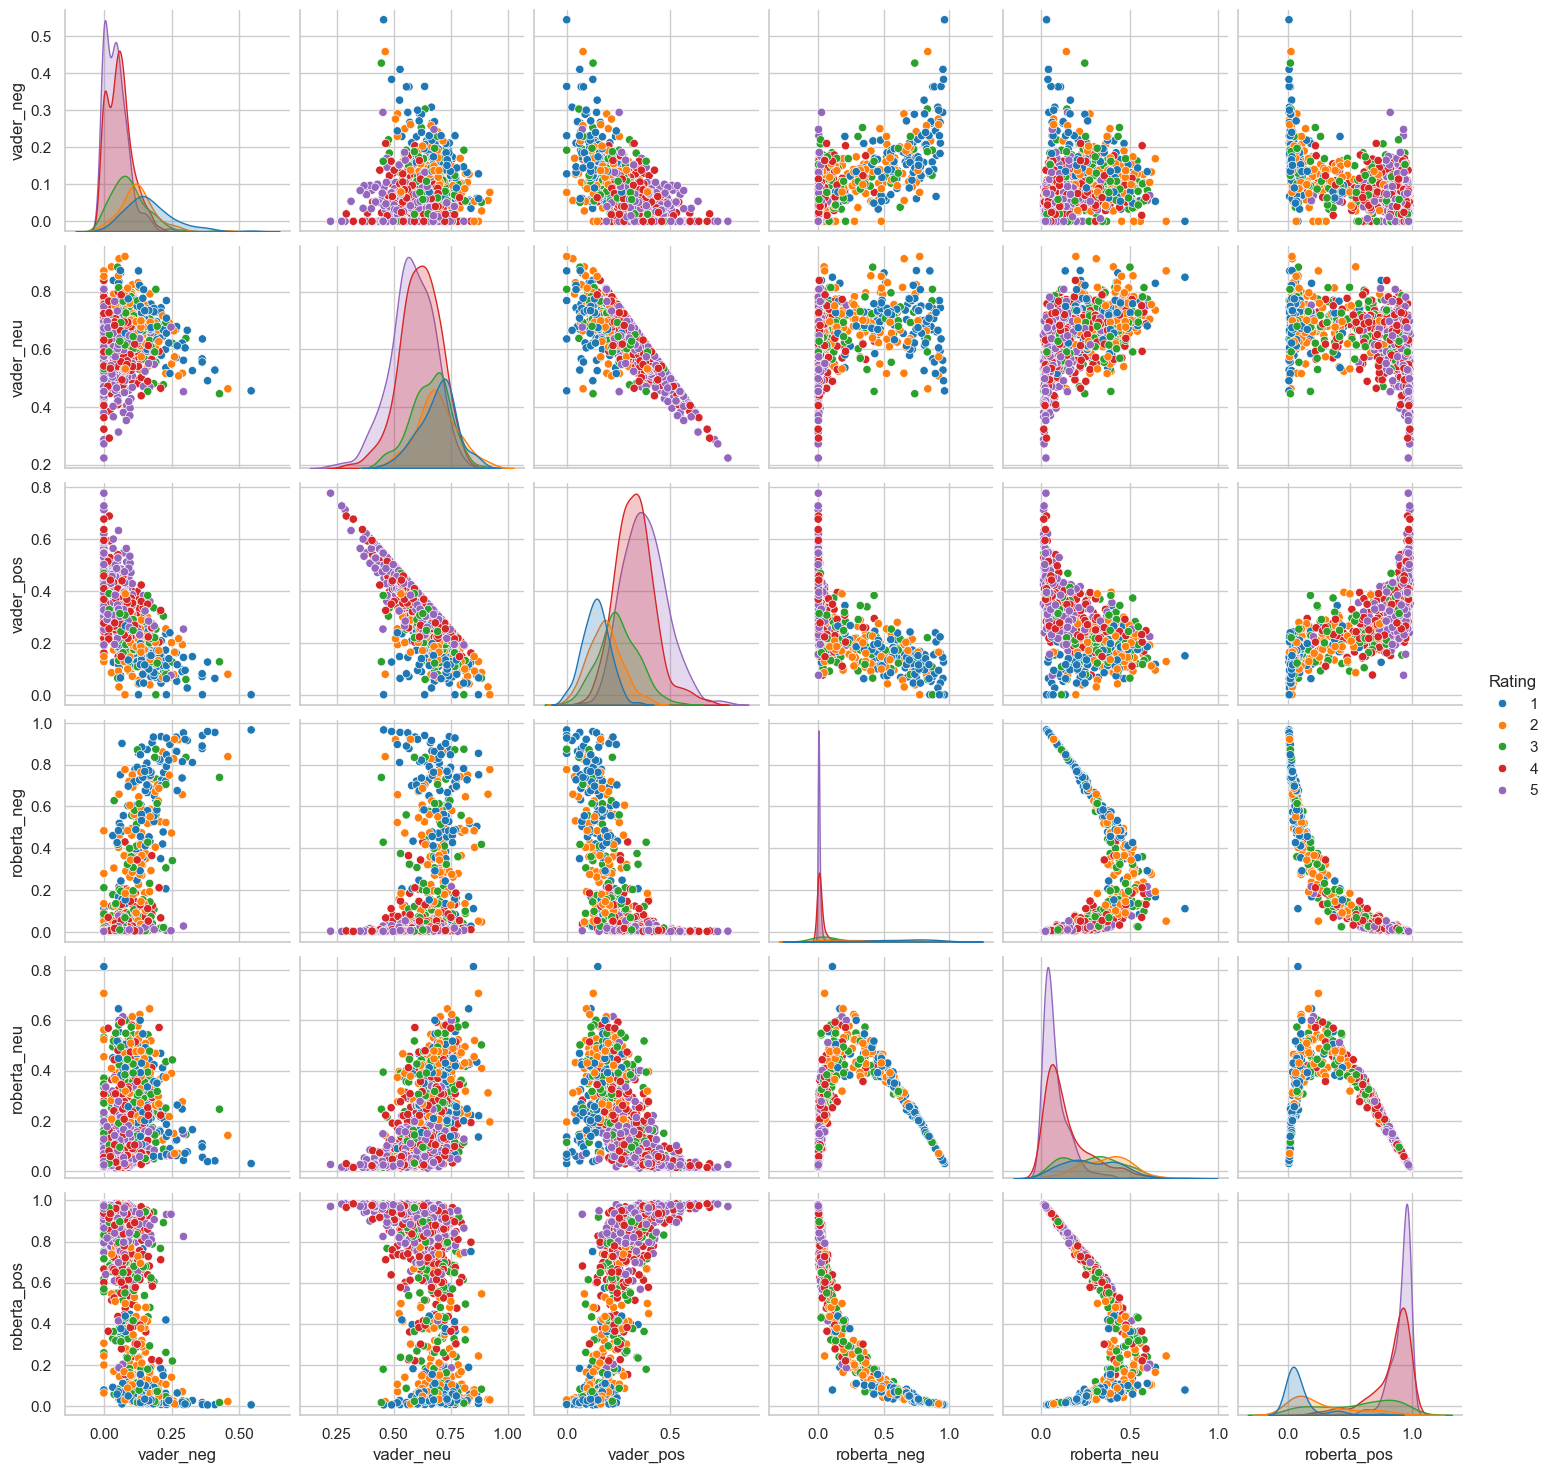

In [200]:
# Plot pairplot to visualize the relationships

plt.figure(figsize=(12, 8))

pairplot = sns.pairplot(
    data=results_df,
    vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
    hue='Rating',
    palette='tab10'
)
plt.show()

# Review examples with high negative sentiment for rating to see the difference

In [201]:
results_df.query('Rating==1').sort_values('roberta_neg',ascending=False)['Review'].values[5]

"cramped noisy overrated husband just stayed hotel mid-july horrible experience, not superior queen room incredibly cramped noises elevator guests rooms nearly impossible sleep night, hotel promises amenities wireless internet access rooms n't working, felt like paid place set sour tone beginning vacation, nights cancelled rest stay booked new hotel,  "

In [202]:
results_df.query('Rating==1').sort_values('vader_neg', ascending=False)['Review'].values[5]

"terrible service, arrived hotel overbooked canceled reservation, desk lady impatient rude, informed cancellation showed person lady did n't offer help hotel, probably better place looked like dump construction worse, walls floors torn no reception area left, lady did n't care situation unwilling help hotel weekend, dozen hotels availability, caused lot unecessary stress n't able mariner game early,  "

In [203]:
# Initialize HuggingFace sentiment analysis pipeline
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [204]:
# Test the sentiment analysis pipeline
sent_pipeline('i hate it!')

[{'label': 'NEGATIVE', 'score': 0.9995840191841125}]


Using both VADER and RoBERTa for sentiment analysis on TripAdvisor hotel reviews provided complementary insights. VADER, a lexicon-based tool, quickly identified general sentiment trends, showing clear positive scores for high ratings and negative scores for low ratings. RoBERTa, a deep learning model, offered a more nuanced understanding, capturing subtleties in longer and complex reviews. While VADER is efficient for quick, broad analysis, RoBERTa excels in detailed sentiment evaluation, making their combined use beneficial for comprehensive sentiment insights.